# Анализ эволюции латинской общественно-политической лексики, выражающей понятие «народ», от античности к Средним векам с помощью эмбеддингов слов

Вариант

In [ ]:
import gensim

# Load the two word embedding models
#classical_model = gensim.models.KeyedVectors.load_word2vec_format('https://embeddings.lila-erc.eu/samples/download/aligned/OperaLatina.vec.txt', binary=False)
#middle_ages_model = gensim.models.KeyedVectors.load_word2vec_format('https://embeddings.lila-erc.eu/samples/download/aligned/OperaMaiora.vec.txt', binary=False)

# Prepare a list of words to analyze
words = ['gens', 'populus', 'natio', 'plebs', 'uulgus']

# Compare the meanings of the words in the two models
for word in words:
    if word in classical_model and word in middle_ages_model:
        similarity = classical_model.similarity(word, middle_ages_model[word])
        print(f'Similarity between {word} in classical and middle ages: {similarity}')
    else:
        print(f'{word} not present in one of the models')
        
# Visualize the results
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# get the word vectors
vectors = []
labels = []
for word in words:
    if word in classical_model and word in middle_ages_model:
        vectors.append(classical_model[word])
        labels.append(word)
        
tsne = TSNE(n_components=2, random_state=0)
vectors_tsne = tsne.fit_transform(vectors)
plt.scatter(vectors_tsne[:, 0], vectors_tsne[:, 1])
for label, x, y in zip(labels, vectors_tsne[:, 0], vectors_tsne[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
plt.show()


KeyError: ignored

In [ ]:
# Load the two pre-trained word embedding models
from gensim.models import Word2Vec
model1 = Word2Vec.load("classical_era_model.bin")
model2 = Word2Vec.load("medieval_era_model.bin")

# Identify the Latin words for "people" in the two eras
people_words_classical = ["populus", "plebs", "gens"]
people_words_medieval = ["populus", "plebs", "gens", "homines"]

# Extract the word vectors for each word
people_vectors_classical = [model1.wv[word] for word in people_words_classical]
people_vectors_medieval = [model2.wv[word] for word in people_words_medieval]

# Compare the word vectors using cosine similarity
from scipy.spatial.distance import cosine
for i in range(len(people_words_classical)):
    similarity = 1 - cosine(people_vectors_classical[i], people_vectors_medieval[i])
    print(f"Similarity between {people_words_classical[i]} in classical and medieval era: {similarity}")

# Perform PCA on the word vectors
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
people_vectors_classical_pca = pca.fit_transform(people_vectors_classical)
people_vectors_medieval_pca = pca.fit_transform(people_vectors_medieval)

# Plot the PCA results
import matplotlib.pyplot as plt
plt.scatter(people_vectors_classical_pca[:, 0], people_vectors_classical_pca[:, 1], color='r')
plt.scatter(people_vectors_medieval_pca[:, 0], people_vectors_medieval_pca[:, 1], color='b')
plt.legend(['Classical Era', 'Medieval Era'])
plt.show()

# Extract the nearest neighbours of the target words
def nearest_neighbours(model, word, n=10):
    return model.wv.most_similar(word, topn=n)



<ipython-input-15-142507d34574>:16: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  people_vectors_classical = [model1.wv[word] for word in words]
<ipython-input-15-142507d34574>:17: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  people_vectors_medieval = [model2.wv[word] for word in words]


Similarity between gens in classical and medieval era: 0.1089944839477539
Similarity between populus in classical and medieval era: -0.14469313621520996
Similarity between natio in classical and medieval era: -0.013743176124989986
Similarity between uulgus in classical and medieval era: 0.018742626532912254
Similarity between genus in classical and medieval era: 0.10008859634399414
Similarity between stirps in classical and medieval era: -0.04545135051012039
Similarity between plebs in classical and medieval era: -0.10358570516109467
Similarity between ciuis in classical and medieval era: -0.03489262983202934
Similarity between ciuitas in classical and medieval era: -0.19689291715621948
Similarity between turba in classical and medieval era: 0.04200400784611702
Similarity between patricius in classical and medieval era: -0.010791834443807602
Similarity between tumultus in classical and medieval era: -0.004233242478221655
Similarity between regnum in classical and medieval era: -0.03433

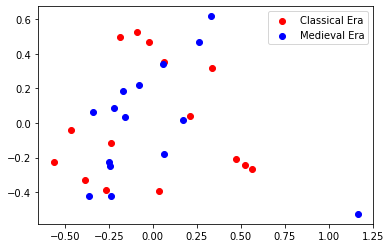

In [ ]:
# Load the two pre-trained word embedding models
from gensim.models import Word2Vec

#model1 = gensim.models.KeyedVectors.load_word2vec_format('https://embeddings.lila-erc.eu/samples/download/aligned/OperaLatina.vec.txt', binary=False)
#model2 = gensim.models.KeyedVectors.load_word2vec_format('https://embeddings.lila-erc.eu/samples/download/aligned/OperaMaiora.vec.txt', binary=False)


# Identify the Latin words for "people" in the two eras

words = ["gens", "populus", "natio", "uulgus", "genus", "stirps",  "plebs", "ciuis", "ciuitas", "turba", "patricius", "tumultus", "regnum", "lingua", "familia"]

# Extract the word vectors for each word
people_vectors_classical = [model1.wv[word] for word in words]
people_vectors_medieval = [model2.wv[word] for word in words]

# Compare the word vectors using cosine similarity
from scipy.spatial.distance import cosine
for i in range(len(words)):
    similarity = 1 - cosine(people_vectors_classical[i], people_vectors_medieval[i])
    print(f"Similarity between {words[i]} in classical and medieval era: {similarity}")

# Perform PCA on the word vectors
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
people_vectors_classical_pca = pca.fit_transform(people_vectors_classical)
people_vectors_medieval_pca = pca.fit_transform(people_vectors_medieval)

# Plot the PCA results
import matplotlib.pyplot as plt
plt.scatter(people_vectors_classical_pca[:, 0], people_vectors_classical_pca[:, 1], color='r')
plt.scatter(people_vectors_medieval_pca[:, 0], people_vectors_medieval_pca[:, 1], color='b')
plt.legend(['Classical Era', 'Medieval Era'])
plt.show()

# Extract the nearest neighbours of the target words
def nearest_neighbours(model, word, n=10):
    return model.wv.most_similar(word, topn=n)

In [ ]:
import gensim
import warnings
warnings.filterwarnings(action='ignore', category=UserWarning, module='gensim')
from gensim.models.keyedvectors import KeyedVectors
from numpy import dot
from numpy.linalg import norm

def cosine_sim(a,b):
    return dot(a, b)/(norm(a)*norm(b))

# load the w2v model
# path_pretraind_model='./GoogleNews-vectors-negative300.bin/GoogleNews-vectors-negative300.bin'  #set as the path of pretraind model 
# model = KeyedVectors.load_word2vec_format(path_pretraind_model, binary=True)

model = KeyedVectors.load_word2vec_format('https://embeddings.lila-erc.eu/samples/download/aligned/OperaLatina.vec.txt', binary=False)


wlist = ["gens", "populus", "natio", "uulgus", "genus", "stirps",  "plebs", "ciuis", "ciuitas", "turba", "patricius", "tumultus", "regnum", "lingua", "familia"]
lenwlist=len(wlist)
avrsim=[]
#compute cosine similarity between each word in wlist with the other words in wlist  
for i in range(lenwlist):
    word=wlist[i]
    totalsim=0
    wordembed=model[word] 
    for j in range(lenwlist):
        if i!=j:
            word2embed=model[wlist[j]] 
            totalsim+=cosine_sim(wordembed, word2embed)
    avrsim.append(totalsim/ (lenwlist-1)) #add the average similarity between word and any other words in wlist   

index_min=avrsim.index(min(avrsim)) #get min similarity        
print(wlist[index_min])

tumultus


https://github.com/sismetanin/word2vec-tsne/blob/master/Visualizing%20Word2Vec%20Word%20Embeddings%20using%20t-SNE.ipynb

In [ ]:
import gensim

model_gn = gensim.models.KeyedVectors.load_word2vec_format('https://embeddings.lila-erc.eu/samples/download/aligned/OperaLatina.vec.txt', binary=False)

In [ ]:
# keys = ["gens", "populus", "natio", "uulgus", "genus", "stirps",  "plebs", "ciuis", "ciuitas", "turba", "patricius", "tumultus", "regnum", "lingua", "familia"]
#keys = ["gens", "populus", "natio", "uulgus",  "plebs"]
keys = ["gens", "populus", "natio", "plebs"]
embedding_clusters = []
word_clusters = []
for word in keys:
    embeddings = []
    words = []
    for similar_word, _ in model_gn.most_similar(word, topn=30):
        words.append(similar_word)
        embeddings.append(model_gn[similar_word])
    embedding_clusters.append(embeddings)
    word_clusters.append(words)

In [ ]:
from sklearn.manifold import TSNE
import numpy as np

embedding_clusters = np.array(embedding_clusters)
n, m, k = embedding_clusters.shape
tsne_model_en_2d = TSNE(perplexity=15, n_components=2, init='pca', n_iter=3500, random_state=32)
embeddings_en_2d = np.array(tsne_model_en_2d.fit_transform(embedding_clusters.reshape(n * m, k))).reshape(n, m, 2)


/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


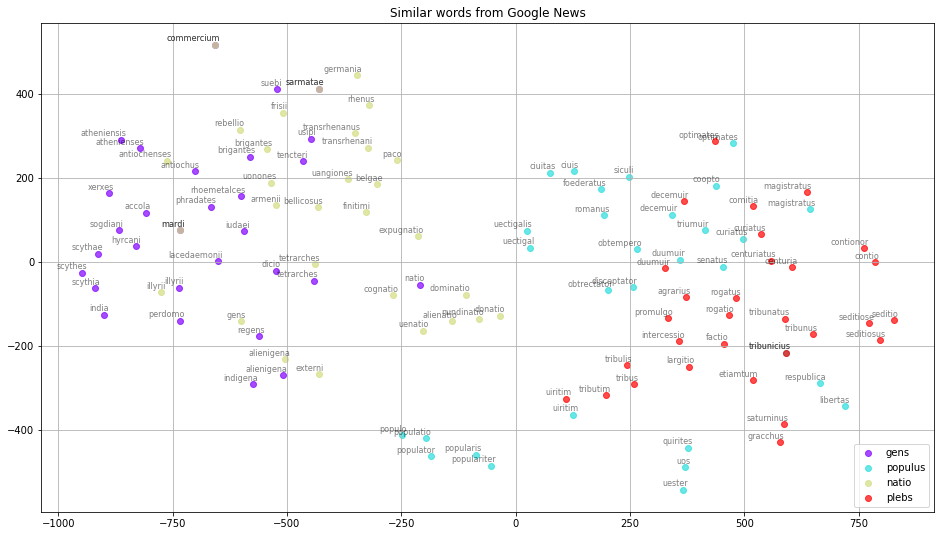

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
#% matplotlib inline


def tsne_plot_similar_words(title, labels, embedding_clusters, word_clusters, a, filename=None):
    plt.figure(figsize=(16, 9))
    colors = cm.rainbow(np.linspace(0, 1, len(labels)))
    for label, embeddings, words, color in zip(labels, embedding_clusters, word_clusters, colors):
        x = embeddings[:, 0]
        y = embeddings[:, 1]
        plt.scatter(x, y, c=color, alpha=a, label=label)
        for i, word in enumerate(words):
            plt.annotate(word, alpha=0.5, xy=(x[i], y[i]), xytext=(5, 2),
                         textcoords='offset points', ha='right', va='bottom', size=8)
    plt.legend(loc=4)
    plt.title(title)
    plt.grid(True)
    if filename:
        plt.savefig(filename, format='png', dpi=250, bbox_inches='tight')
    plt.show()


tsne_plot_similar_words('Similar words from Google News', keys, embeddings_en_2d, word_clusters, 0.7,
                        'similar_words.png')

Here is some sample Python code for analyzing semantic changes in the meanings of Latin words expressing the concepts of "people" using word embedding models and cosine similarity:

In [2]:
import gensim
import numpy as np

# Load the two word embedding models
classical_model = gensim.models.KeyedVectors.load_word2vec_format('https://embeddings.lila-erc.eu/samples/download/aligned/OperaLatina.vec.txt', binary=False)
medieval_model = gensim.models.KeyedVectors.load_word2vec_format('https://embeddings.lila-erc.eu/samples/download/aligned/OperaMaiora.vec.txt', binary=False)

# Define the list of words expressing the concept of "people"
people_words = ["populus", "plebs", "gens", "tribus"]

# Compare the distances between the words in each model
for word in people_words:
    classical_embedding = classical_model[word]
    medieval_embedding = medieval_model[word]
    cosine_similarity = np.dot(classical_embedding, medieval_embedding) / (np.linalg.norm(classical_embedding) * np.linalg.norm(medieval_embedding))
    print("Cosine similarity for", word, ":", cosine_similarity)

Cosine similarity for populus : -0.14469314
Cosine similarity for plebs : -0.1035857
Cosine similarity for gens : 0.108994484
Cosine similarity for tribus : -0.05760555


In [ ]:
import gensim

# load the two word embedding models
classical_model = gensim.models.KeyedVectors.load_word2vec_format('https://embeddings.lila-erc.eu/samples/download/aligned/OperaLatina.vec.txt', binary=False)
medieval_model = gensim.models.KeyedVectors.load_word2vec_format('https://embeddings.lila-erc.eu/samples/download/aligned/OperaMaiora.vec.txt', binary=False)

# list of Latin words expressing the concept of "people"
people_words = ["populus", "plebs", "gens", "tribus", "multitudo"]

for word in people_words:
    # check if the word is in both models
    if word in classical_model and word in medieval_model:
        # calculate the cosine similarity between the word vectors
        similarity = classical_model.similarity(word, medieval_model[word])
        print(f"Similarity between '{word}' in classical and medieval models: {similarity}")
    else:
        print(f"'{word}' not found in one or both models")

KeyError: ignored

In [ ]:
# Compare the meanings of the words in the two models
for word in words:
    if word in classical_model and word in middle_ages_model:
        similarity = classical_model.similarity(word, middle_ages_model[word])
        print(f'Similarity between {word} in classical and middle ages: {similarity}')
    else:
        print(f'{word} not present in one of the models')

KeyError: ignored

In [ ]:
similarity = classical_model.similarity("gens", middle_ages_model["gens"])

KeyError: ignored